In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import random

# Set seed for any random operations
random.seed(1)

# First, let's open the file!
print("loading")
data = pd.read_excel("SBA_Loan_data_.xlsx", "Sheet1")
print("loaded")

loading
loaded


In [2]:
# What's the size of our dataset?
print "Number of samples:", data.shape[0]

# Observe the first few rows.
data.head()

Number of samples: 147423


,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,...,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
0,504,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,...,NaN,12,NaN,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NaT,0.0
1,504,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,...,NaN,240,NaN,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NaT,0.0
2,504,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,...,NaN,120,NaN,NaN,ST JOSEPH,IN,CORPORATION,PIF,NaT,0.0
3,504,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,...,NaN,240,NaN,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28,0.0
4,504,"RON SAUNORIS GARDEN CTR, INC.",13747 W. 159TH ST.,LOCKPORT,IL,60441,MISSNG/INACTV LENDER,NaN,NaN,NaN,...,NaN,240,NaN,NaN,WILL,IL,CORPORATION,CANCLD,NaT,0.0


In [3]:
# Observe NaN rows in borrower state
nan_state_rows = data[data['BorrState'].isnull()]
nan_state_rows

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,...,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
36780,504,ASSETSALE07 73X4149 FINBUSGTY,NaN,NaN,NaN,0,MISSNG/INACTV LENDER,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,EXEMPT,NaT,0.0
78608,504,MMS LOGISTIC CORPORATION,CARR 181 KM 2.3 BARRIO CELAD,GURABO,NaN,778,Puerto Rico Business Developme,Capitan Espada Street,San Juan,PR,...,NaN,240,484220.0,Specialized Freight (except Used Goods) Trucki...,GURABO,PR,CORPORATION,CANCLD,NaT,0.0


In [4]:
# Drop bad data
data = data[data.LoanStatus != 'CANCLD']
data = data[data.LoanStatus != 'EXEMPT']

# Convert loan status to a boolean
data["Default?"] = data['LoanStatus'] == 'CHGOFF'

# Drop 'Program' column
data = data.drop(columns=['Program'])

# Drop NaN rows found previously
data = data.dropna(subset=['BorrState'])

# Specify that NAICS + ZIP codes and 'ApprovalFiscalYear' are categorical
data[['NaicsCode','BorrZip','CDC_Zip','ApprovalFiscalYear']] = data[['NaicsCode','BorrZip','CDC_Zip','ApprovalFiscalYear']].fillna("MISSING")
data[['NaicsCode','BorrZip','CDC_Zip','ApprovalFiscalYear']] = data[['NaicsCode','BorrZip','CDC_Zip','ApprovalFiscalYear']].astype(str)

# Fill in the empty entries under 'ChargeOffDate' with NA/not applicable
data.update(data['ChargeOffDate'].fillna("NA"))

data.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,Default?
0,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,65109.0,...,12,MISSING,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NA,0.0,False
1,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,92106.0,...,240,MISSING,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NA,0.0,False
2,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,46601.0,...,120,MISSING,NaN,ST JOSEPH,IN,CORPORATION,PIF,NA,0.0,False
3,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,62704.0,...,240,MISSING,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28 00:00:00,0.0,True
6,"ROCKY MTN EMPLOYE BENEFTS, INC",3200 S. 700 E.,SALT LAKE CITY,UT,84106,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,UT,84109.0,...,240,MISSING,NaN,SALT LAKE,UT,CORPORATION,PIF,NA,0.0,False


In [5]:
# Fill missing categorical data with a MISSING tag
numerics = data.select_dtypes(include=np.number)
cats = data.drop(columns=numerics.columns)
cats = data.fillna("MISSING")
data.update(cats)

data.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,Default?
0,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,65109.0,...,12,MISSING,MISSING,WYANDOTTE,KS,INDIVIDUAL,PIF,NA,0.0,False
1,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,92106.0,...,240,MISSING,MISSING,RIVERSIDE,CA,INDIVIDUAL,PIF,NA,0.0,False
2,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,46601.0,...,120,MISSING,MISSING,ST JOSEPH,IN,CORPORATION,PIF,NA,0.0,False
3,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,62704.0,...,240,MISSING,MISSING,SALINE,IL,CORPORATION,CHGOFF,2003-03-28 00:00:00,0.0,True
6,"ROCKY MTN EMPLOYE BENEFTS, INC",3200 S. 700 E.,SALT LAKE CITY,UT,84106,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,UT,84109.0,...,240,MISSING,MISSING,SALT LAKE,UT,CORPORATION,PIF,NA,0.0,False


In [6]:
# Remove nonsense ZIP codes
# Process a table of ZIP code ranges for each state found online
file = open("zipcodes.csv","r")
zip_ref = [line.strip().split(",") for line in file]
zip_ref = {line[2] : (int(line[3]),int(line[4])) for line in zip_ref}
# Deal with corner cases ("GU" = Guam and "VI" = Virgin Islands)
zip_ref["MISSING"] = (1,-1)
zip_ref["GU"] = (96910,96932)
zip_ref["VI"] = (801, 851)

# Make a record we can edit while iterating
zips = data[['BorrState','BorrZip','CDC_State','CDC_Zip']]

for index, series in data.iterrows():
    # Load ranges
    borr_bot, borr_top = zip_ref[series['BorrState']]
    cdc_bot, cdc_top = zip_ref[series['CDC_State']]

    # Check borrower zip code
    if(series['BorrZip'] == "MISSING"):
        borr_zip = -1
    else:
        borr_zip = float(series['BorrZip']) 
        
    # Check CDC zip code
    if(series['CDC_Zip'] == "MISSING"):
        cdc_zip = -1
    else:
        cdc_zip = float(series['CDC_Zip']) 

    # compare with ranges
    if borr_bot > borr_zip or borr_zip > borr_top:
        zips.at[index,'BorrZip'] = "MISSING"
    if borr_bot > cdc_zip or cdc_zip > borr_top:
        zips.at[index,'CDC_Zip'] = "MISSING"
data.update(zips)

data.to_csv("output/output_with_missing.csv")

data.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,Default?
0,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,MISSING,...,12,MISSING,MISSING,WYANDOTTE,KS,INDIVIDUAL,PIF,NA,0.0,False
1,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,92106.0,...,240,MISSING,MISSING,RIVERSIDE,CA,INDIVIDUAL,PIF,NA,0.0,False
2,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,46601.0,...,120,MISSING,MISSING,ST JOSEPH,IN,CORPORATION,PIF,NA,0.0,False
3,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,62704.0,...,240,MISSING,MISSING,SALINE,IL,CORPORATION,CHGOFF,2003-03-28 00:00:00,0.0,True
6,"ROCKY MTN EMPLOYE BENEFTS, INC",3200 S. 700 E.,SALT LAKE CITY,UT,84106,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,UT,84109.0,...,240,MISSING,MISSING,SALT LAKE,UT,CORPORATION,PIF,NA,0.0,False


In [7]:
# List the column headers
print list(data)

# Count how many unique values are in certain columns
print "Number of samples:", data.shape[0]
print "BorrName vals:", len(data['BorrName'].unique())
print "BorrStreet vals:", len(data['BorrStreet'].unique())
print "CDC_Street vals:", len(data['CDC_Street'].unique())
print "ThirdPartyLender_Name vals:", len(data['ThirdPartyLender_Name'].unique())
print "ThirdPartyLender_City vals:", len(data['ThirdPartyLender_City'].unique())
print "InitialInterestRate vals:", len(data['InitialInterestRate'].unique())

[u'BorrName', u'BorrStreet', u'BorrCity', u'BorrState', u'BorrZip', u'CDC_Name', u'CDC_Street', u'CDC_City', u'CDC_State', u'CDC_Zip', u'ThirdPartyLender_Name', u'ThirdPartyLender_City', u'ThirdPartyLender_State', u'ThirdPartyDollars', u'GrossApproval', u'ApprovalDate', u'ApprovalFiscalYear', u'DeliveryMethod', u'subpgmdesc', u'InitialInterestRate', u'TermInMonths', u'NaicsCode', u'NaicsDescription', u'ProjectCounty', u'ProjectState', u'BusinessType', u'LoanStatus', u'ChargeOffDate', u'GrossChargeOffAmount', 'Default?']
Number of samples: 54807
BorrName vals: 52069
BorrStreet vals: 53511
CDC_Street vals: 334
ThirdPartyLender_Name vals: 2386
ThirdPartyLender_City vals: 1582
InitialInterestRate vals: 2


In [8]:
# train, validation, and test
subsets = {}

# Save 10% as test data
shuffled = data.sample(frac=1)
test_start_index = int(round(data.shape[0] * .9))
subsets["test"] = shuffled[test_start_index:].copy()

# Shuffle remaining rows
remaining_data = data[:test_start_index]
remaining_data = remaining_data.sample(frac=1)

# Split remaining into 80% training, 10% validation sets
validation_start_index = int(round(remaining_data.shape[0] * 8./9))
subsets["train"] = remaining_data[:validation_start_index].copy()
subsets["validation"] = remaining_data[validation_start_index:].copy()

print "Num rows in train:", len(subsets["train"])
print "Num rows in test:", len(subsets["test"])
print "Num rows in validation:", len(subsets["validation"])

Num rows in train: 43845
Num rows in test: 5481
Num rows in validation: 5481


In [9]:
# Normalize numerical variables
def normalize_col(data, col_name):
    if pd.notna(data).any:
        mean = np.nanmean(data[col_name])
        stdev = np.nanstd(data[col_name])
        if stdev != 0:
            return data[col_name].apply(lambda x: (x-mean)/stdev)
    return 0

for name in subsets.keys():
    numerics = subsets[name].select_dtypes(include=np.number)
    for column in numerics.columns:
        subsets[name].loc[:,column + '_Norm'] = normalize_col(subsets[name], column)

# Fill missing numerical data with means
for name in subsets.keys():
    numerics = subsets[name].select_dtypes(include=np.number)
    means = dict(zip(numerics.columns, np.nanmean(numerics,axis = 0)))
    numerics = numerics.fillna(means)
    subsets[name].update(numerics)
    
subsets["train"].head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,Default?,GrossApproval_Norm,TermInMonths_Norm,GrossChargeOffAmount_Norm
11592,W. TROY AND MAE L.WATSON,3505 ORIOLE PL,CHARLOTTE,NC,28215,Centralina Development Corpora,1300 Baxter Street,Charlotte,NC,28204.0,...,MECKLENBURG,NC,CORPORATION,PIF,NA,0.0,False,-0.754161,0.238765,-0.245704
58767,"THANH NGOC NGUYEN D.M.D., INC",12620 BROOKHURST STREET,GARDEN GROVE,CA,92840,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,92106.0,...,ORANGE,CA,CORPORATION,PIF,NA,0.0,False,0.401556,0.238765,-0.245704
27490,ALL-SEAL HOME IMPROVEMENTS,6104 POE AVE.,VANDALIA,OH,45414,County Corp Development,130 W. Second St.,Dayton,OH,45402.0,...,MONTGOMERY,OH,CORPORATION,PIF,NA,0.0,False,-0.451848,0.238765,-0.245704
37933,141 SHELL,13 SOUTH US HIGHWAY 141,CRIVITZ,WI,54114,Great Lakes Asset Corporation,200 S Washington St.,Green Bay,WI,54301.0,...,MARINETTE,WI,INDIVIDUAL,PIF,NA,0.0,False,0.193716,0.238765,-0.245704
51156,SENSATION STATION SKATELAND,SHILO DRIVE,MT. VERNON,IL,62864,South Central Illinois Regiona,120 Delmar Avenue,Salem,IL,62881.0,...,JEFFERSON,IL,CORPORATION,CHGOFF,2010-01-08 00:00:00,307949.0,True,-0.584110,0.238765,1.566451


In [10]:
# View numerical variables
data.select_dtypes(include=np.number).head()

,GrossApproval,TermInMonths,GrossChargeOffAmount
0,166000,12,0.0
1,117000,240,0.0
2,261000,120,0.0
3,262000,240,0.0
6,154000,240,0.0


In [11]:
# Write results to file
subsets["train"].to_csv("output/train.csv")
subsets["test"].to_csv("output/test_with_missing.csv")
subsets["validation"].to_csv("output/validation_with_missing.csv")

In [12]:
# Compute some statistics
chargeoff_count = (subsets["train"]['ChargeOffDate'] != "NA").sum()
print 'Chargeoffs:', chargeoff_count
print 'Percentage of loans that defaulted:', float(chargeoff_count)/len(subsets["train"])

subsets["train"]['GrossChargeOffAmount'].describe()

Chargeoffs: 5381
Percentage of loans that defaulted: 0.122727791082


count    4.384500e+04
mean     4.175380e+04
std      1.699372e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.279220e+06
Name: GrossChargeOffAmount, dtype: float64

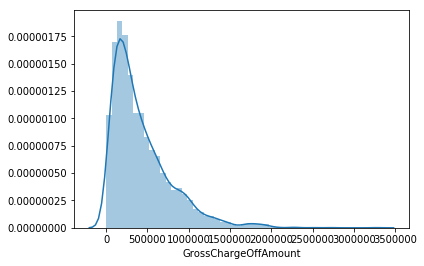

In [13]:
# Visualize the training data here with plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Histogram of chargeoff amounts (excluding zero amounts)
positive_chargeoffs = subsets["train"]['GrossChargeOffAmount'] > 0.0
sns.distplot(subsets["train"][positive_chargeoffs]['GrossChargeOffAmount']);

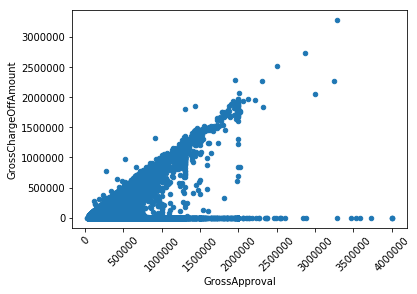

In [14]:
# Correlation between GrossChargeOffAmount and GrossApproval
var = 'GrossApproval'
corr_data = pd.concat([subsets["train"]['GrossChargeOffAmount'], subsets["train"][var]], axis=1)
corr_data.plot.scatter(x=var, y='GrossChargeOffAmount',rot=45);

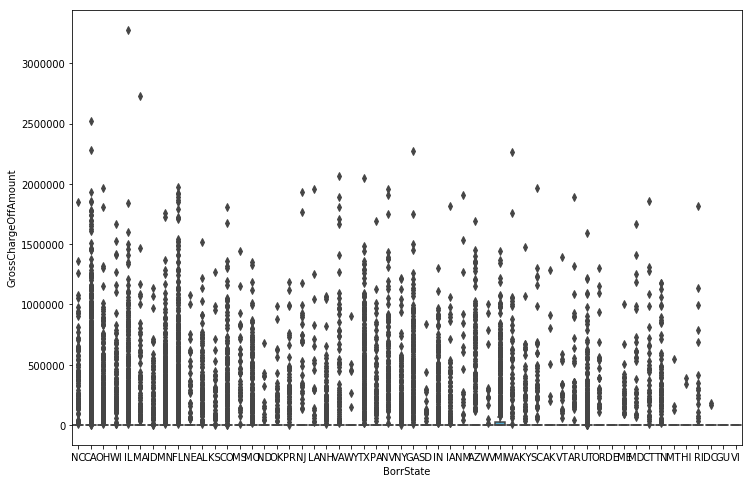

In [15]:
# Plot between NAICS code and GrossChargeOffAmount
var = 'BorrState'
cat_data = pd.concat([subsets["train"]['GrossChargeOffAmount'], subsets["train"][var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y='GrossChargeOffAmount', data=cat_data)

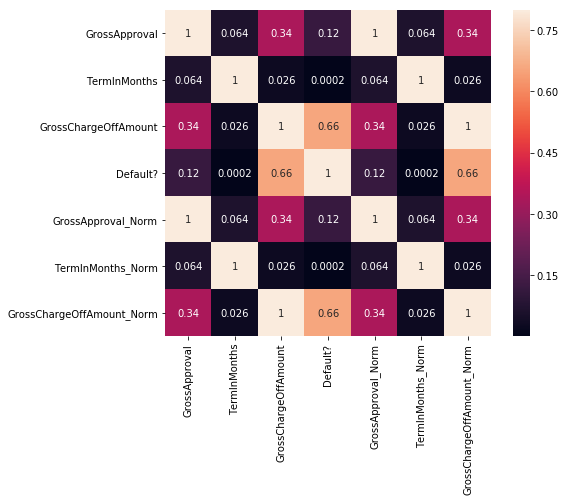

In [16]:
# Correlation matrix
corr_mat = subsets["train"].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, vmax=.8, annot=True, square=True);